In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [108]:
# Import the Dataset
df=pd.read_excel("C:/Users/Dell/Downloads/marketing_campaign.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-04-09 00:00:00,58.0,635.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-08-03 00:00:00,38.0,11.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-10-02 00:00:00,26.0,11.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [109]:
df.info()
# observation -> here, total 2240 samples and 29 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   float64
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   float64
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   float64
 11  MntMeatProducts      2240 non-null   float64
 12  MntFishProducts      2240 non-null   float64
 13  MntSweetProducts     2240 non-null   float64
 14  MntGoldProds         2240 non-null   float64
 15  NumDealsPurchases    2240 non-null   f

Let's look at the summary statistics of the data. We can see that the maximum income is much higher than the income at the 3rd quatile (almost 10 times greater). Also, the maximum amount spent on wines and meat products (i.e. MntWines, MntMeatProduct) are significantly greater than the one spent on other products.

In [110]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## INSPECTING DATAFRAME

In [111]:
df.shape

(2240, 29)

# Checking null values

In [112]:
#checking for null values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# DATA CLEANING

we can see that two columns 'Z_CostContact' and 'Z_Revenue' which haven't been described by the data.
Dropping columns because they will not contribute anything in model building


In [113]:
#data cleaning
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-04-09 00:00:00,58.0,635.0,...,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-08-03 00:00:00,38.0,11.0,...,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,...,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-10-02 00:00:00,26.0,11.0,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
plt.rcParams.update(plt.rcParamsDefault)

# Checking correlation between the attributes

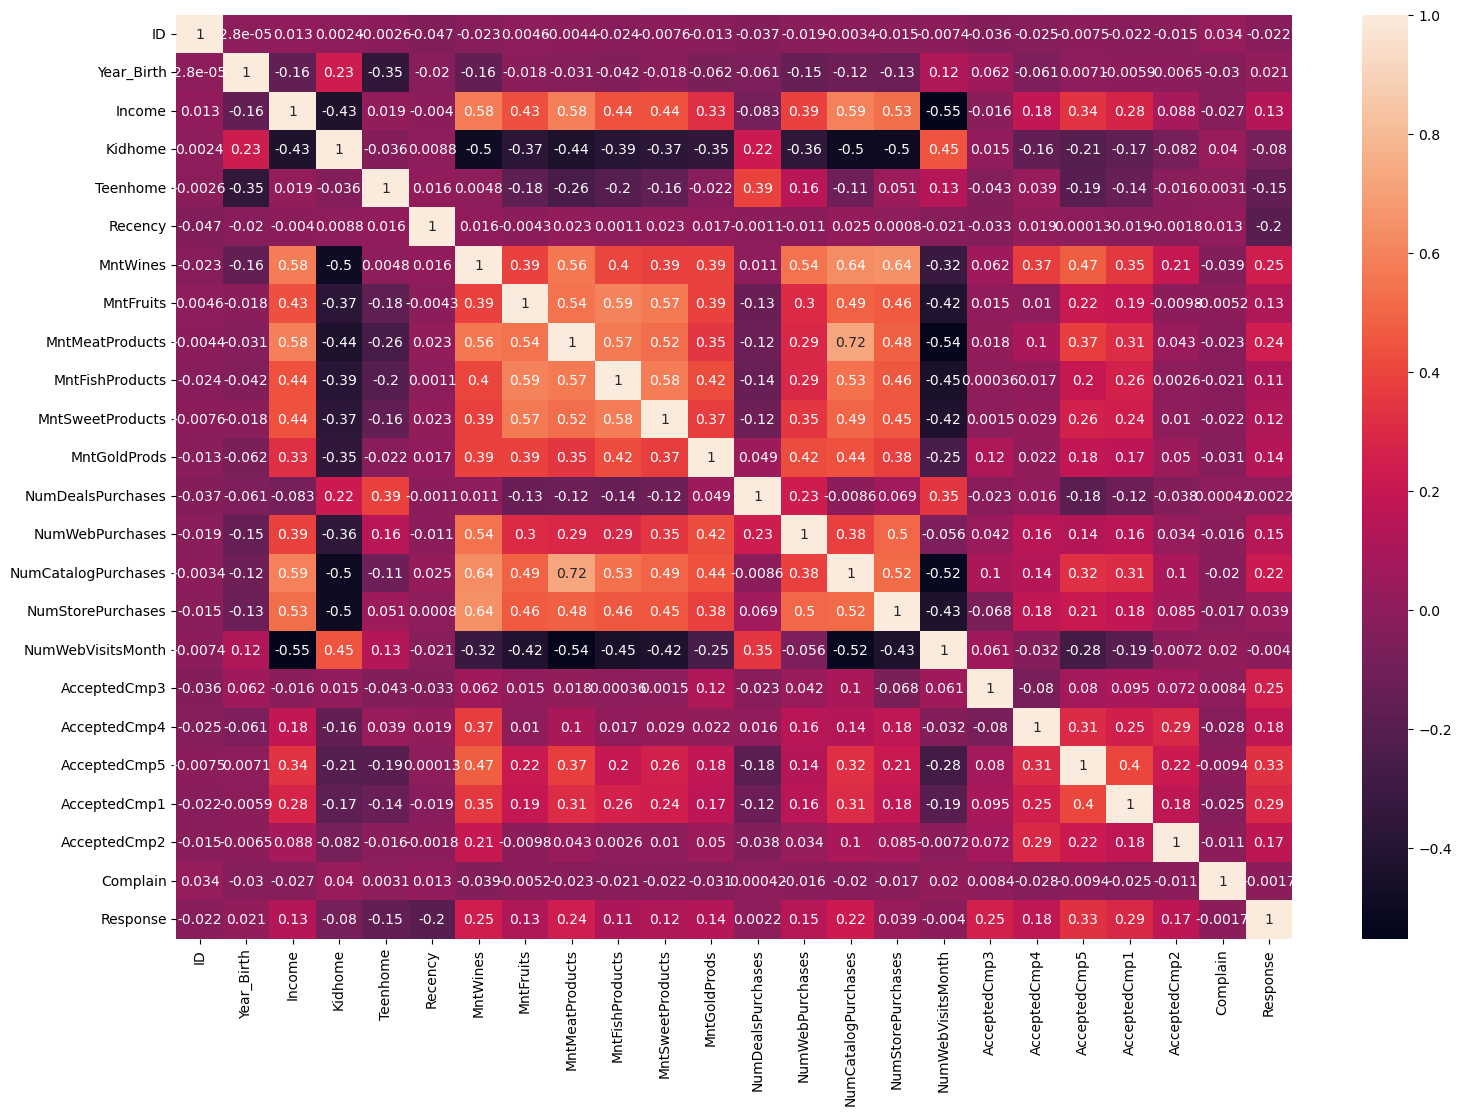

In [115]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

No two columns are too much correlated with each other so we can't drop any column on the basis of correlation.
Checking for correlation by unstacking data
It is used to calculate how one variable is correlated/ dependent on other variable.
Extreme values signify high correlation. Multicollinear variables with correlation more than a threshold are usually dropped from the dataset.

In [116]:
# Check the Correlation Report
corr_data = df.corr()
corr_data.abs().unstack().sort_values(ascending=False)[24:50:2]

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
NumCatalogPurchases  MntWines               0.635226
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
                     MntMeatProducts        0.584633
MntFishProducts      MntSweetProducts       0.579870
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.553088
MntMeatProducts      MntFruits              0.543105
dtype: float64

# PREPROCESSING OF THE DATASET

Filling the missing value in the income my mean

In [117]:
# Preprocessing of dataset
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

# Checking number of unique categories present in the "Marital_Status"

In [118]:
# Checking number of unique categories present in the "Marital_Status"
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

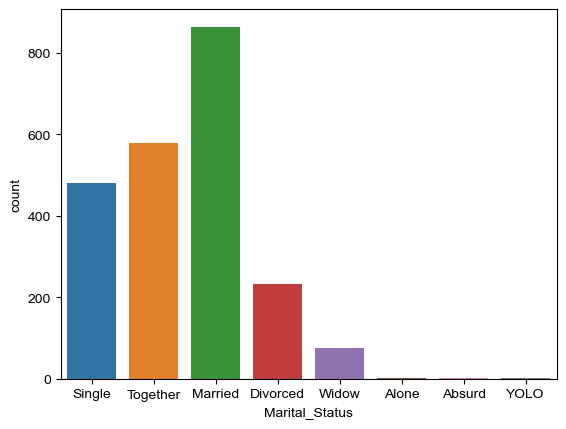

In [119]:
sns.countplot(df.Marital_Status)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [120]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

# In the above cell we are grouping 'Married', 'Together' as "relationship"

Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

Count of different values present in Marital_Status

In [121]:
df['Marital_Status'].value_counts()  

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

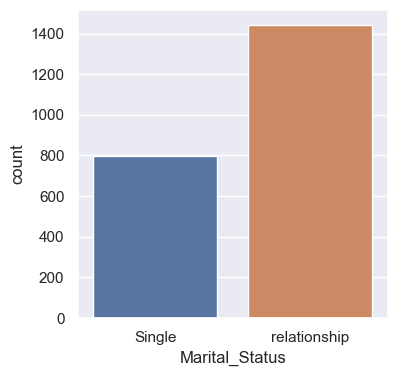

In [122]:
sns.countplot(df.Marital_Status)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

# Separating Products to different Dataframe for Association Rule Mining

In [123]:
# Separating products to different dataframe for association rule mining
product_data = []
for i in range(0, len(df)):
  productdata = [df['MntWines'][i], df['MntFruits'][i], 
                  df['MntMeatProducts'][i], df['MntFishProducts'][i], 
                  df['MntSweetProducts'][i], df['MntGoldProds'][i]]
  product_data.append(productdata)
Products_DF = pd.DataFrame(product_data, columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
Products_DF.head()

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,635.0,88.0,546.0,172.0,88.0,88.0
1,11.0,1.0,6.0,2.0,1.0,6.0
2,426.0,49.0,127.0,111.0,21.0,42.0
3,11.0,4.0,20.0,10.0,3.0,5.0
4,173.0,43.0,118.0,46.0,27.0,15.0


# Combining different dataframe into a single column to reduce the number of dimension

In [124]:
# Combining different dataframe into a single column to reduce the number of dimension
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Deleting some column to reduce dimension and complexity of model

In [125]:
# Deleting some column to reduce dimension and complexity of model
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524.0,1957.0,Graduation,Single,58138.0,2012-04-09 00:00:00,58.0,0.0,0.0,1617.0,1.0,25.0
1,2174.0,1954.0,Graduation,Single,46344.0,2014-08-03 00:00:00,38.0,0.0,2.0,27.0,0.0,6.0
2,4141.0,1965.0,Graduation,relationship,71613.0,21-08-2013,26.0,0.0,0.0,776.0,0.0,21.0
3,6182.0,1984.0,Graduation,relationship,26646.0,2014-10-02 00:00:00,26.0,0.0,1.0,53.0,0.0,8.0
4,5324.0,1981.0,PhD,relationship,58293.0,19-01-2014,94.0,0.0,1.0,422.0,0.0,19.0


Adding a column "Age" in the dataframe

In [126]:
# Adding a column "Age" in the dataframe
df['Age'] = 2015 - df["Year_Birth"]

# Count of different values present in Education

In [127]:
# Count of different values present in Education
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [128]:
# Changing category into UG and PG only
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [129]:
# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [130]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

In [131]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,PG,Single,58138.0,0.0,1617.0,1.0,25.0,58.0,997
1,PG,Single,46344.0,2.0,27.0,0.0,6.0,61.0,151
2,PG,relationship,71613.0,0.0,776.0,0.0,21.0,50.0,498
3,PG,relationship,26646.0,1.0,53.0,0.0,8.0,31.0,91
4,PG,relationship,58293.0,1.0,422.0,0.0,19.0,34.0,347


# VISUALIZATION

In [132]:
# Visualization
plt.rcParams.update(plt.rcParamsDefault)

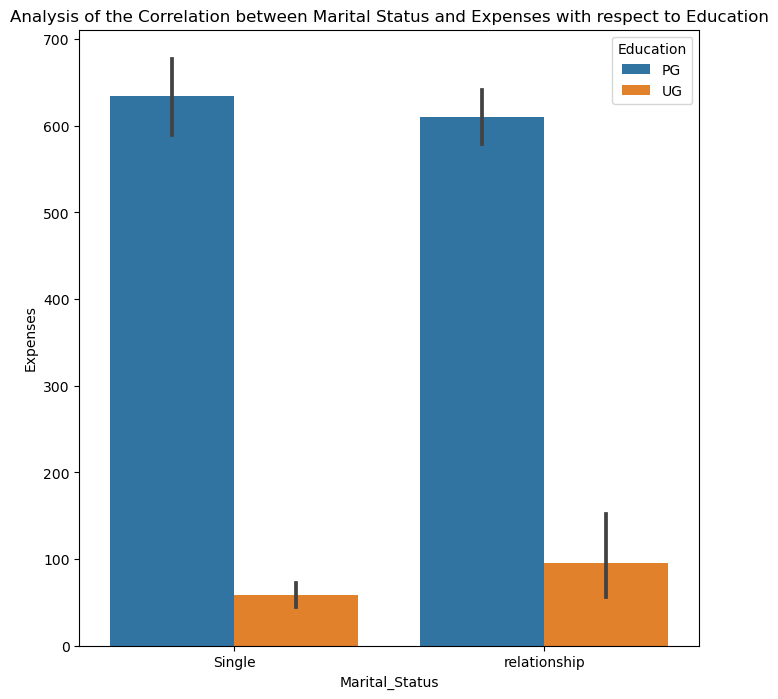

In [133]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'], hue = df["Education"])
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")
plt.show()

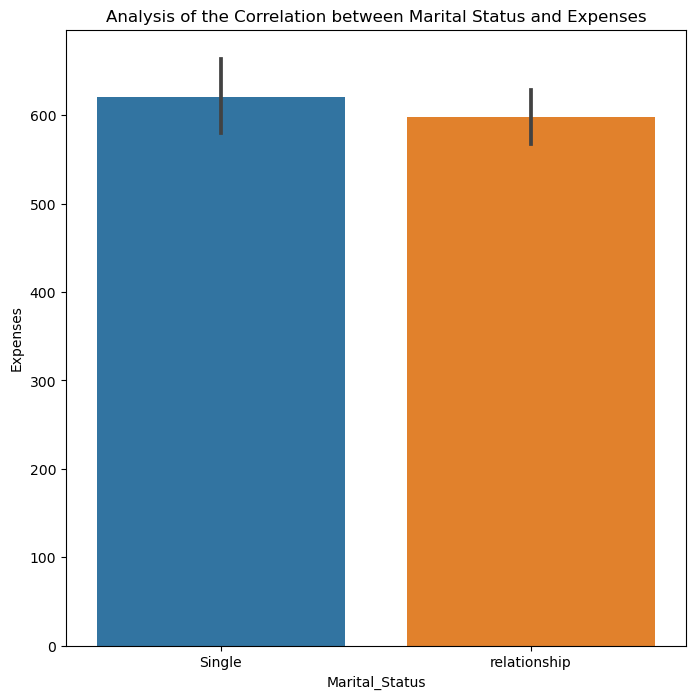

In [134]:
# ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND EXPENSES
plt.figure(figsize=(8,8))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'])
plt.title("Analysis of the Correlation between Marital Status and Expenses")
plt.show()

In [135]:
# DISTRIBUTION OF EXPENSES WITH RESPECT TO MARITAL STATUS

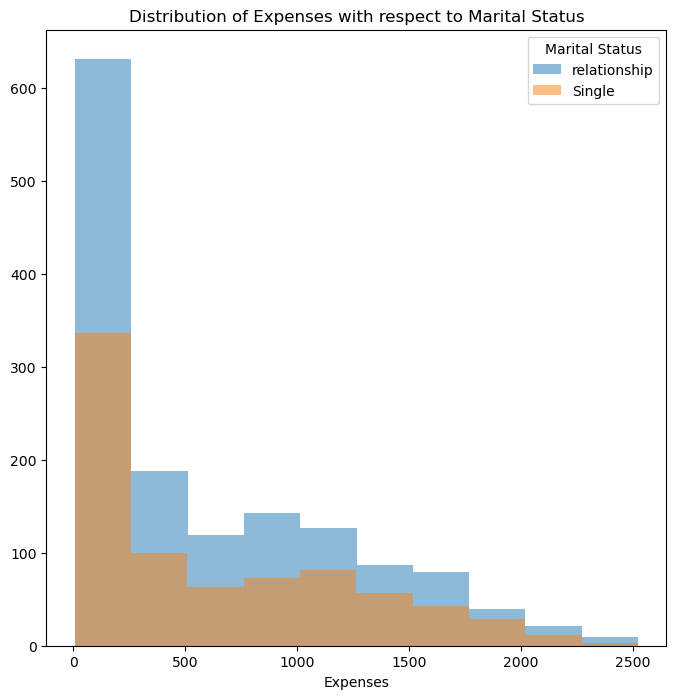

In [136]:
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Expenses", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Expenses with respect to Marital Status")
plt.xlabel("Expenses")
plt.legend(title = "Marital Status")
plt.show()

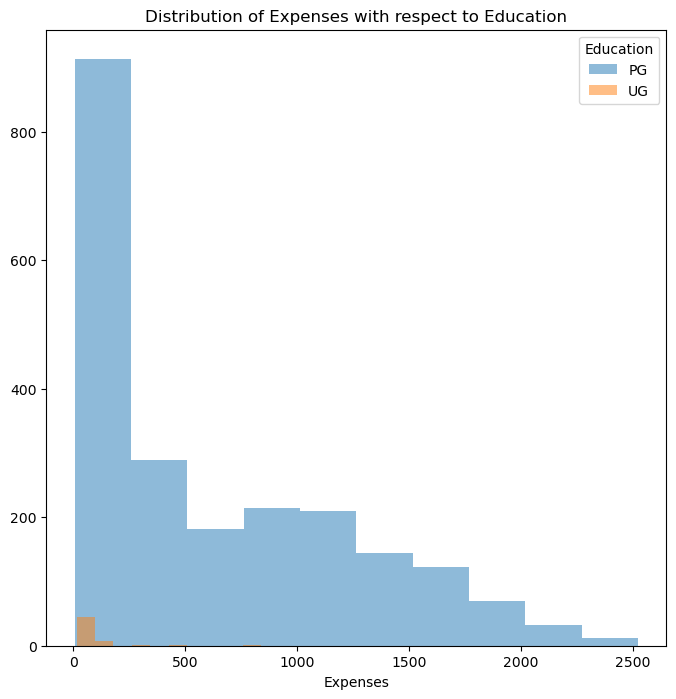

In [137]:
#DISTRIBUTION OF EXPENSES WITH RESPECT TO EDUCATION
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("Expenses", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Expenses with respect to Education")
plt.xlabel("Expenses")
plt.legend(title = "Education")
plt.show()

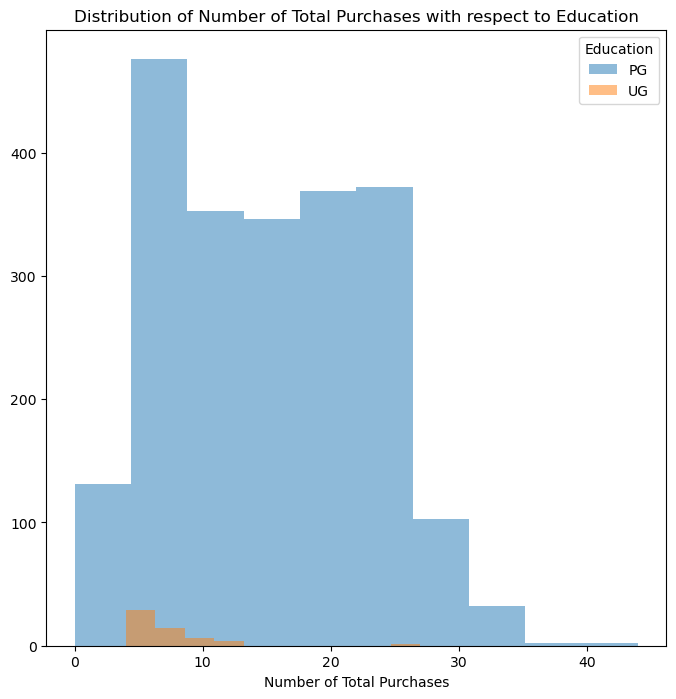

In [138]:
# DISTRIBUTION OF NUMBER OF TOTAL EXPENSES WITH RESPECT TO EDUCATION
plt.figure(figsize=(8,8))
plt.hist("NumTotalPurchases", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("NumTotalPurchases", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Number of Total Purchases with respect to Education")
plt.xlabel("Number of Total Purchases")
plt.legend(title = "Education")
plt.show()

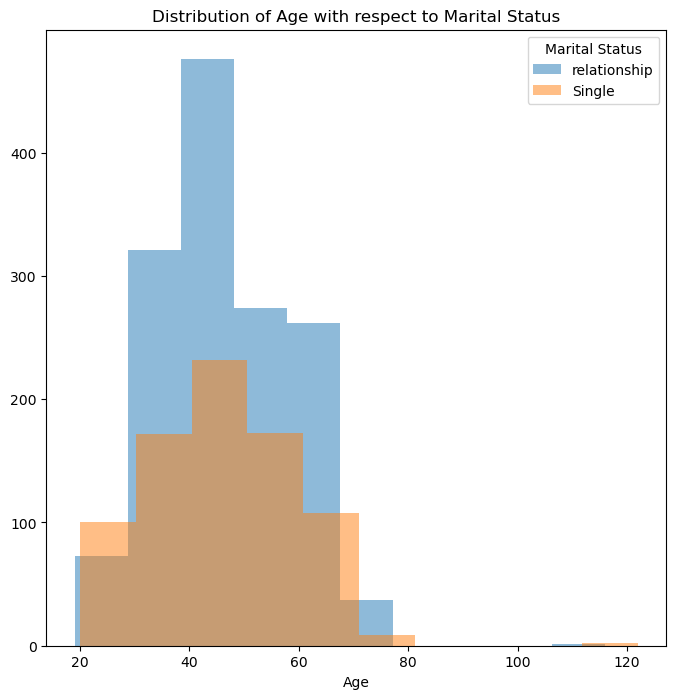

In [139]:
# DISTRIBUTION OF AGE WITH RESPECT TO MARITAL STATUS
plt.figure(figsize=(8,8))
plt.hist("Age", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Age", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Age with respect to Marital Status")
plt.xlabel("Age")
plt.legend(title = "Marital Status")
plt.show()

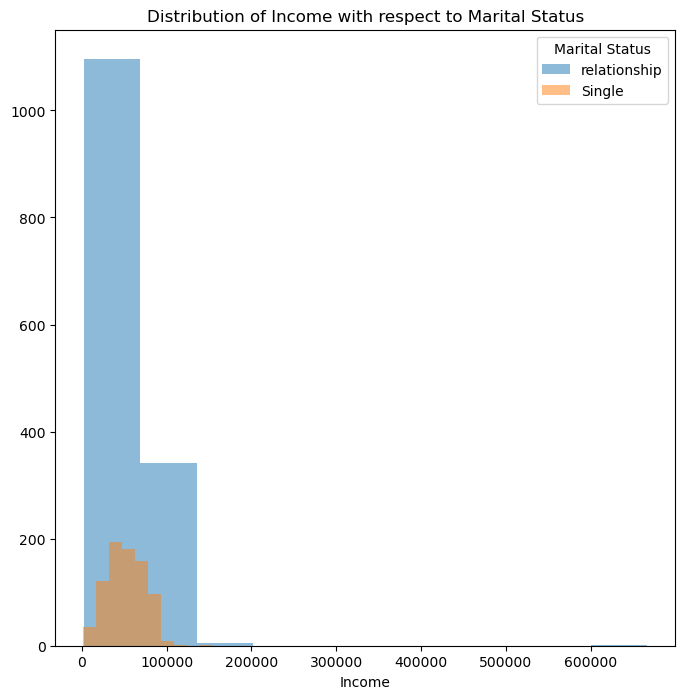

In [140]:
# DISTRIBUTION OF INCOME WITH RESPECT TO MARITAL STATUS
plt.figure(figsize=(8,8))
plt.hist("Income", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Income", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Income with respect to Marital Status")
plt.xlabel("Income")
plt.legend(title = "Marital Status")
plt.show()

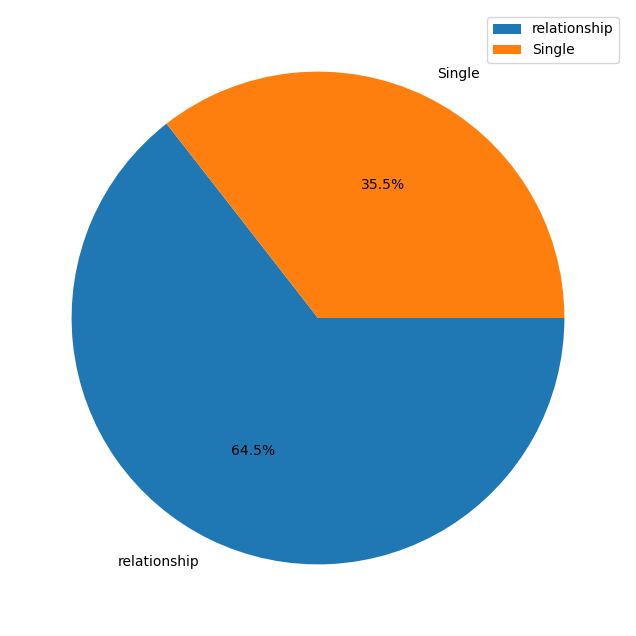

In [142]:
#ANALYSIS OF THE DISTRIBUTION OF PEOPLE ACCORDING TO MARITAL STATUS
plt.figure(figsize=(8,8))
plt.pie(df["Marital_Status"].value_counts(), labels = ["relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

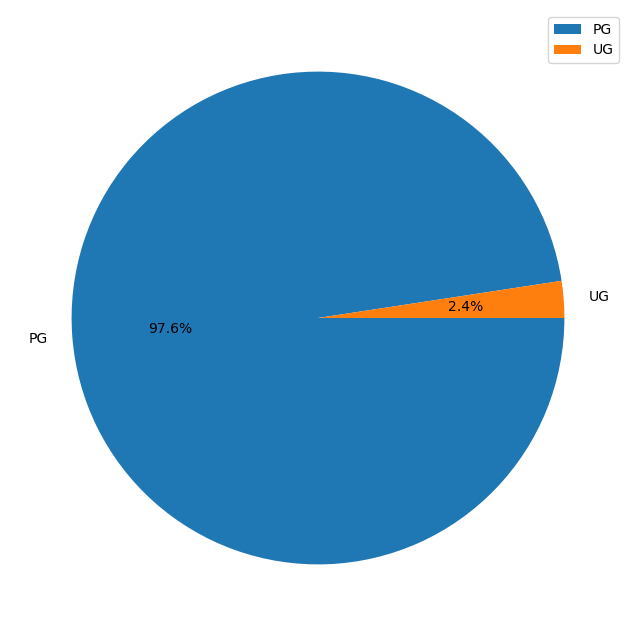

In [143]:
# ANALYSIS OF THE DISTRIBUTION OF PEOPLE ACCORDING TO EDUCATION
plt.figure(figsize=(8,8))
plt.pie(df["Education"].value_counts(), labels = ["PG", "UG"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()


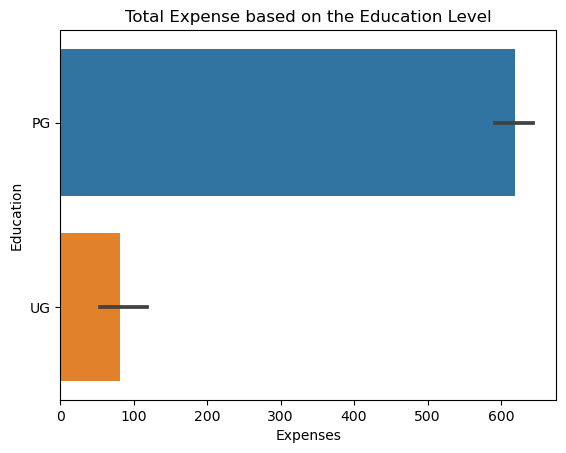

In [145]:
# DISTRIBUTION OF EXPENSES BASED ON EDUCATION
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');
plt.show()

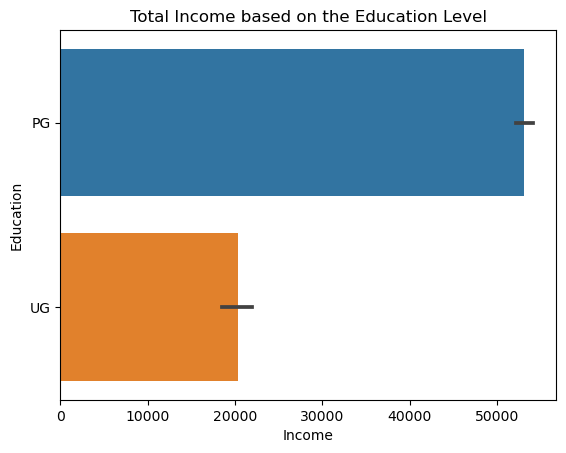

In [146]:
# INCOME BASED ON EDUCATION LEVEL
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');
plt.show()

In [147]:
df.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,538.043304
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,232.229893
min,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,26.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,539.000000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,711.250000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,1089.000000


In [148]:
# LABEL ENCODING

cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [149]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 

In [150]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [151]:
df1 = df.copy()

In [152]:
df1.head(3)

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,0,0,58138.0,0.0,1617.0,1.0,25.0,58.0,997
1,0,0,46344.0,2.0,27.0,0.0,6.0,61.0,151
2,0,1,71613.0,0.0,776.0,0.0,21.0,50.0,498


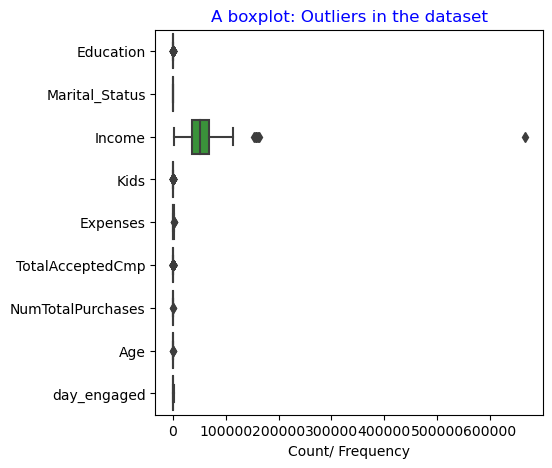

In [153]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df1 , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

In [154]:
from math import sqrt
# Drop Outliers
q3 = df1.quantile(0.75)
q1 = df1.quantile(0.25)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

df1 = df1[~( (df1 < lower_range)|(df1 > upper_range) ).any(axis=1)]

In [155]:
from sklearn.cluster import KMeans

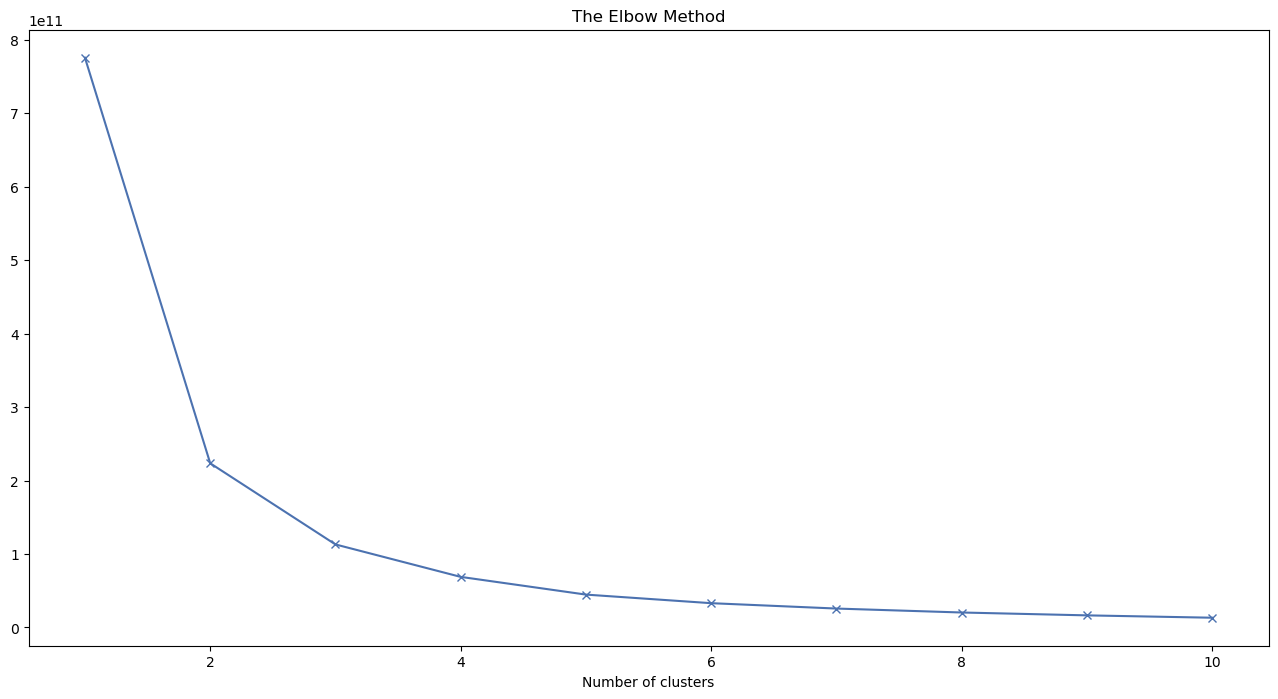

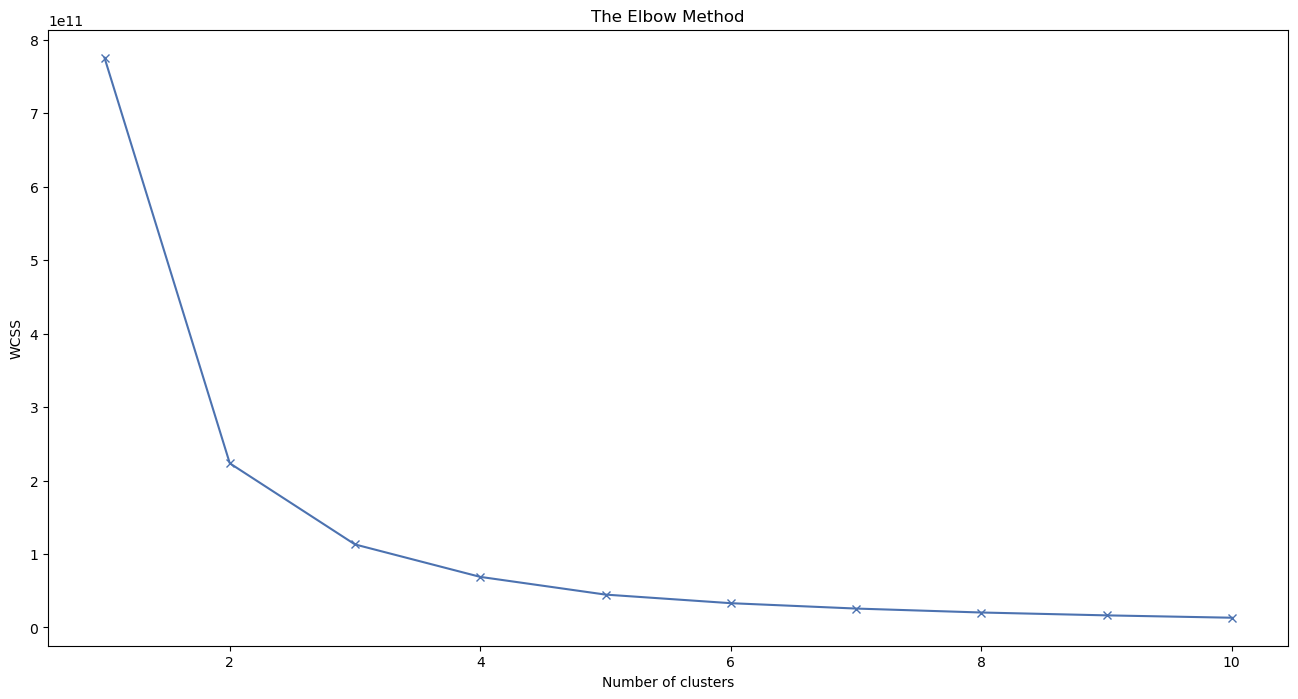

In [157]:
wcss=[] ##Initializing the list for the values of WCSS  
for i in range (1,11): #for diferent values of k ranging from 1 to 10
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(df1)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [158]:
from sklearn.metrics import silhouette_score 

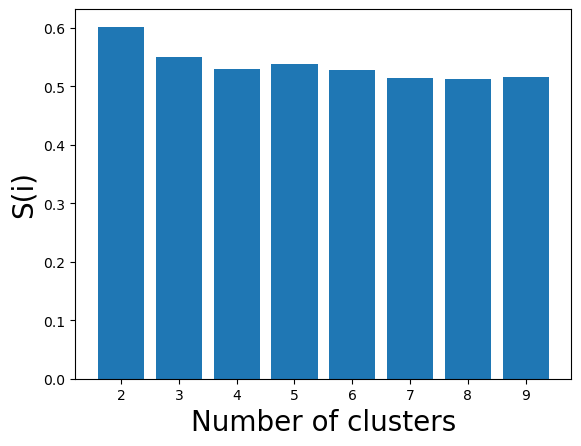

In [159]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(df1)
    silhouette_scores.append(silhouette_score(df1, m1.fit_predict(df1))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [160]:
silhouette_scores

[0.6019176509329532,
 0.5506120696242276,
 0.5304165873033932,
 0.5378321972505982,
 0.5278636251994239,
 0.5138240874440817,
 0.5126306022957949,
 0.5164960531209415]

In [161]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


In [162]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(df1)
pred=kmeans.predict(df1)


# Appending those cluster value into main dataframe (without standard-scalar)

df1['cluster'] = pred + 1

In [163]:
df1.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0.0,1617.0,1.0,25.0,58.0,997,1
1,0,0,46344.0,2.0,27.0,0.0,6.0,61.0,151,2
2,0,1,71613.0,0.0,776.0,0.0,21.0,50.0,498,1
3,0,1,26646.0,1.0,53.0,0.0,8.0,31.0,91,2
4,0,1,58293.0,1.0,422.0,0.0,19.0,34.0,347,1


Clustering

In [164]:
df1['cluster'].value_counts()

1    1018
2    1004
Name: cluster, dtype: int64

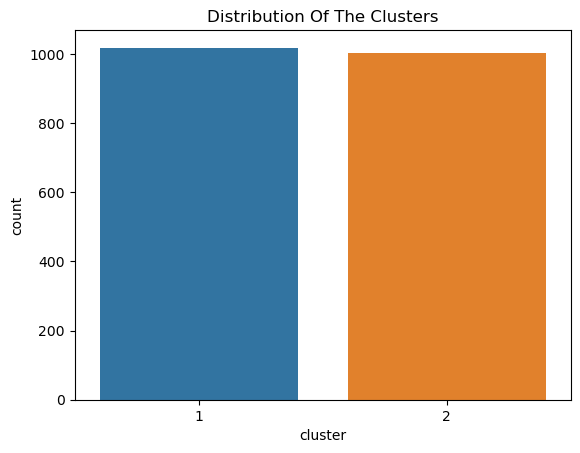

In [165]:
pl = sns.countplot(x=df1["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [166]:
#Observations
# Clusters interpretation 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


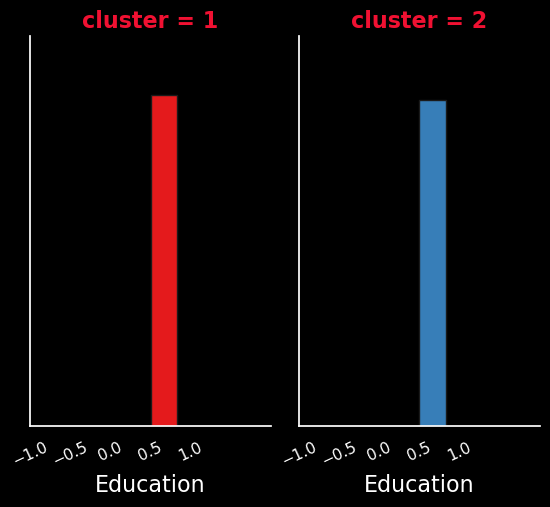

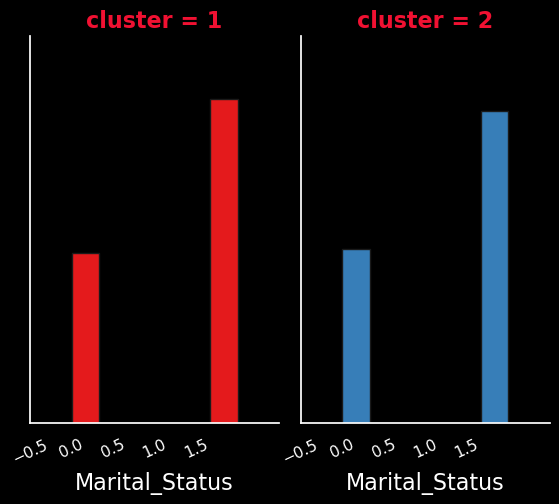

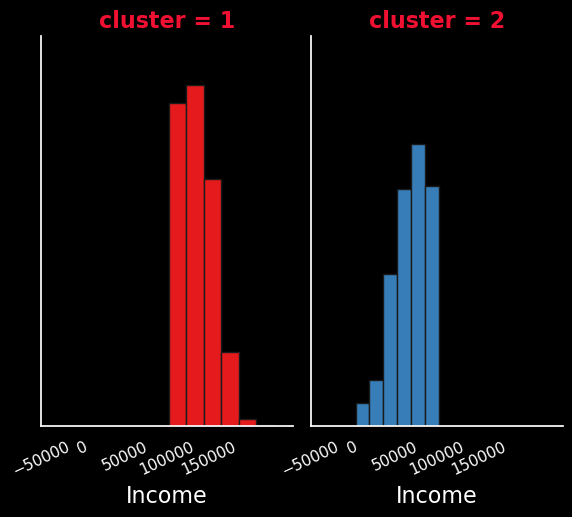

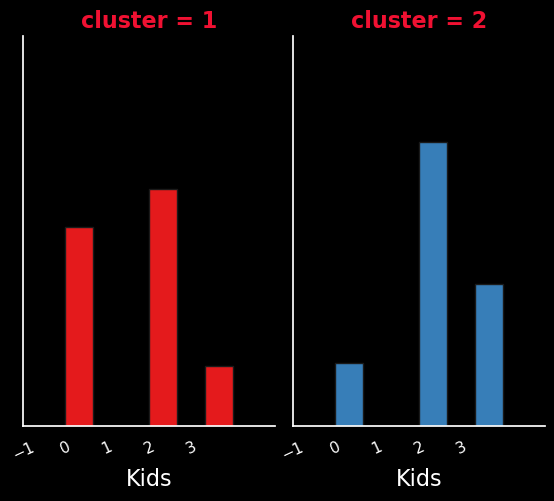

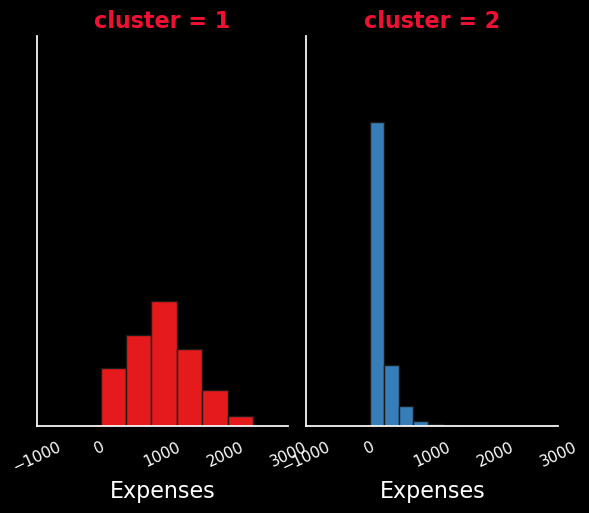

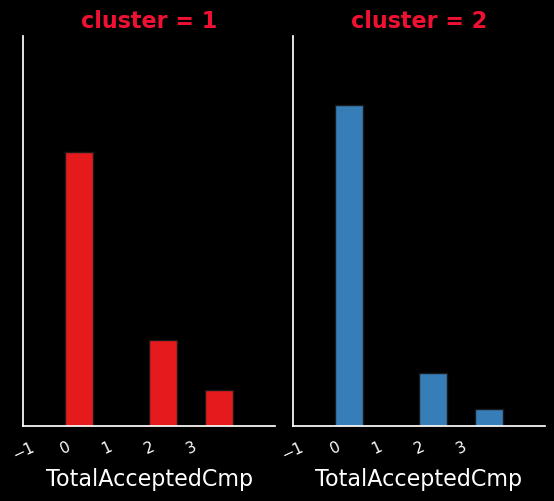

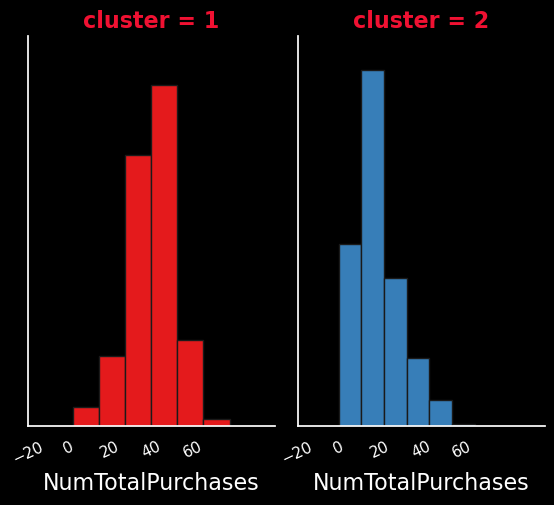

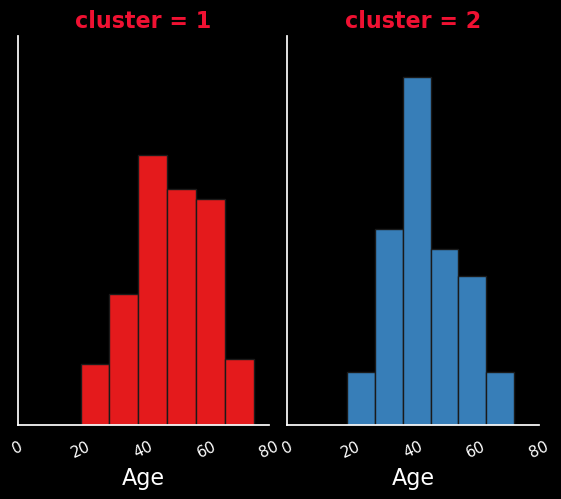

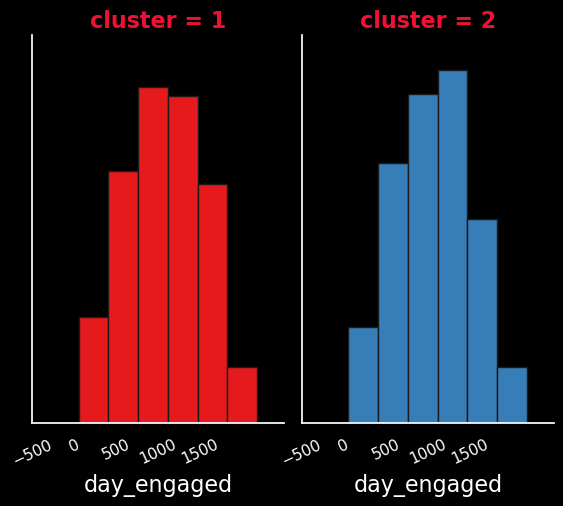

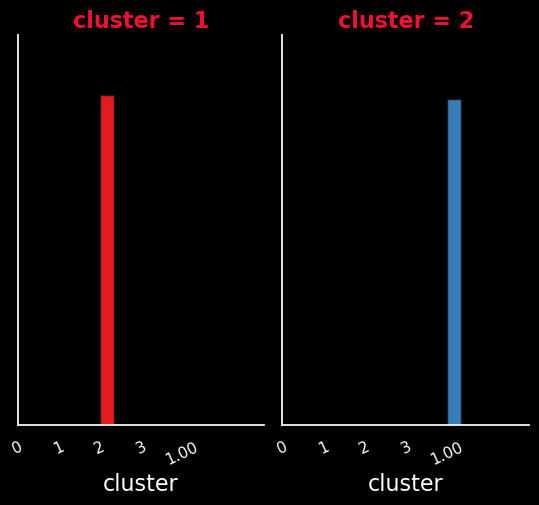

In [167]:
for i in df1:
    diag = sns.FacetGrid(df1, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

plt.show()

In [181]:
import plotly.offline as pyo+
+uyjm
import plotly.graph_objs as go

PLOT = go.Figure()
for C in list(df1.cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df1[df1.cluster == C]['Income'],
                                y = df1[df1.cluster == C]['Age'],
                                z = df1[df1.cluster == C]['day_engaged'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Age: %{y} <br>Days Engaged: %{z}')
PLOT.show()

ModuleNotFoundError: No module named 'plotly'

In [172]:
import numpy as np                               
import pandas as pd                               
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'plotly'